# Implementasi Algoritma K-Nearest Neighbors (KNN)
Dataset penelitian ini dikumpulkan dari RSUD Kolonodale, Kabupaten Morowali Utara, Sulawesi Tengah. Dataset terdiri dari 1.491 baris data dengan 8 fitur utama serta target prediksi yang relevan untuk analisis risiko diabetes.

| No | Nama Atribut       | Deskripsi                                                      |
|----|--------------------|----------------------------------------------------------------|
| 1  | Jumlah Kehamilan   | Jumlah kehamilan yang dialami pasien.                          |
| 2  | Gula Darah         | Kadar gula darah pasien (mg/dL).                               |
| 3  | Tekanan Darah      | Tekanan darah pasien (mmHg).                                   |
| 4  | Lingkar Perut      | Ketebalan kulit di area tertentu (mm).                         |
| 5  | Insulin            | Kadar insulin pasien (µU/mL).                                  |
| 6  | BMI                | Indeks Massa Tubuh pasien (kg/m²).                             |
| 7  | Riwayat Keluarga   | Riwayat keluarga dengan diabetes (1 = ada, 0 = tidak).         |
| 8  | Usia               | Usia pasien (tahun).                                           |
| 9  | Outcome            | Target prediksi: 1 (menderita diabetes), 0 (tidak).            |

### 1. Memuat Dataset
Langkah pertama adalah memuat dataset ke dalam program.

In [74]:
# Import Library untuk Membaca Dataset
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Membaca Dataset
file_path = 'data/diabetes.csv'  # Lokasi file dataset
dataset = pd.read_csv(file_path)  # Membaca dataset
dataset.head(10)

,Jumlah Kehamilan,Gula Darah,Tekanan Darah,Lingkar Perut,Insulin,IMT,Riwayat Keluarga,Usia,Outcome
0,0,144.00,136.670,89.09,238.81,39.13,1,76,1
1,2,168.83,138.635,71.68,104.13,36.13,0,78,0
2,0,130.80,148.190,86.38,121.35,36.37,1,67,0
3,1,148.94,126.305,90.09,249.56,32.74,0,61,0
4,0,156.56,137.615,100.66,201.93,36.02,1,62,1
5,3,165.55,153.680,82.05,248.62,32.50,0,45,0
6,0,116.01,144.590,68.55,48.53,35.39,0,34,0
7,0,136.84,176.750,110.69,177.87,32.71,0,63,1
8,0,188.08,156.005,104.57,175.80,33.87,1,62,1
9,0,203.86,121.385,88.22,188.65,37.80,0,51,1


### 2. Analisis Awal Dataset (Pemeriksaan Nilai Kosong)
Dataset diperiksa untuk memastikan tidak ada nilai kosong pada setiap atribut:

In [75]:
# Mengecek Jumlah Nilai Kosong pada Setiap Kolom
print("Jumlah Nilai Kosong pada Setiap Kolom:")
print(dataset.isnull().sum())

Jumlah Nilai Kosong pada Setiap Kolom:
Jumlah Kehamilan    0
Gula Darah          0
Tekanan Darah       0
Lingkar Perut       0
Insulin             0
IMT                 0
Riwayat Keluarga    0
Usia                0
Outcome             0
dtype: int64


### 3. Visualisasi Proporsi Kelas dengan Pie Chart

Jumlah Pasien Tidak Diabetes: 786
Jumlah Pasien Diabetes: 705


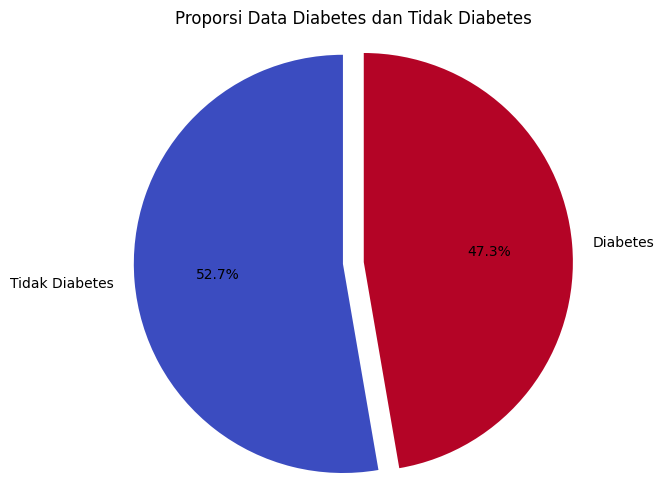

In [76]:
# Menghitung jumlah pasien diabetes dan tidak diabetes
outcome_counts = dataset['Outcome'].value_counts()  # Jumlah 0 (Tidak Diabetes) dan 1 (Diabetes)
labels = ['Tidak Diabetes', 'Diabetes']  # Label untuk setiap kelas

# Menampilkan jumlah pasien
print(f"Jumlah Pasien Tidak Diabetes: {outcome_counts[0]}")
print(f"Jumlah Pasien Diabetes: {outcome_counts[1]}")

# Membuat pie chart
import matplotlib.pyplot as plt

colors = ['#3b4cc0', '#b40426']  # Warna: biru untuk Tidak Diabetes, merah untuk Diabetes
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
plt.title("Proporsi Data Diabetes dan Tidak Diabetes")
plt.axis('equal')  # Membuat pie chart berbentuk bundar
plt.show()

### 4. Visualisasi Korelasi Fitur
Heatmap ini menunjukkan hubungan antar fitur dalam dataset.

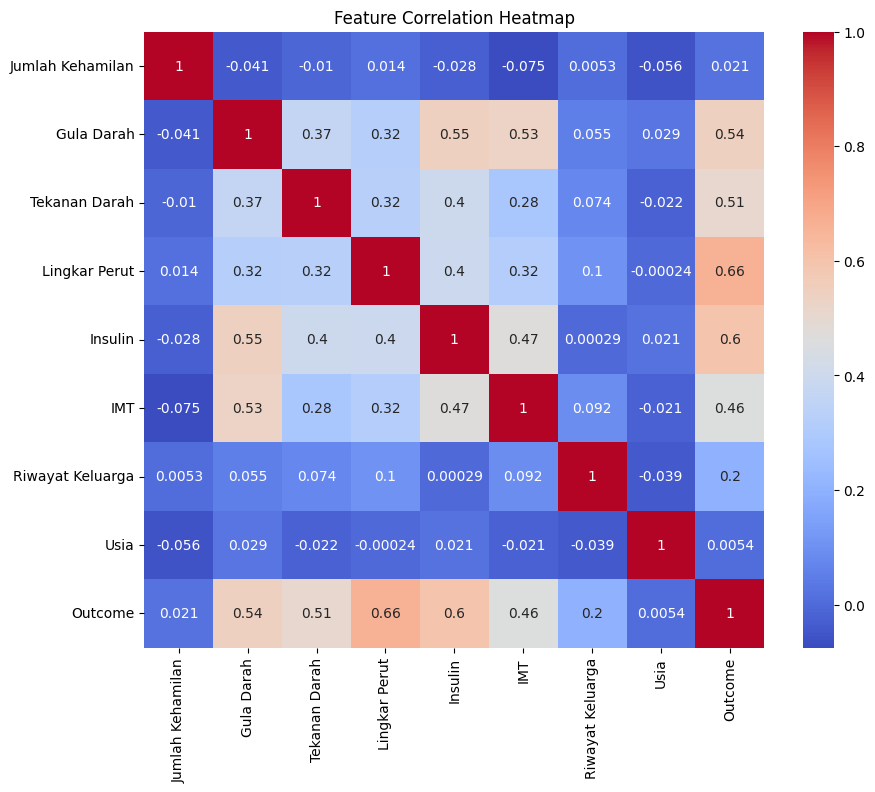

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap korelasi fitur
plt.figure(figsize=(10, 8))
corr = dataset.corr()  # Menghitung korelasi antar fitur
sns.heatmap(corr, annot=True, cmap="coolwarm")  # Visualisasi heatmap
plt.title("Feature Correlation Heatmap")  # Judul
plt.show()

### 5. Normalisasi Data
Data dinormalisasi menggunakan metode Min-Max Scaling agar semua atribut berada pada skala yang sama. Berikut adalah 10 data pertama setelah normalisasi:

In [78]:
# Normalisasi dataset dengan Min-Max Scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(dataset.drop(columns=['Outcome']))
normalized_df = pd.DataFrame(normalized_data, columns=dataset.columns[:-1])
normalized_df['Outcome'] = dataset['Outcome']

# Menampilkan 10 baris pertama dataset yang sudah dinormalisasi
normalized_df.head(10)

,Jumlah Kehamilan,Gula Darah,Tekanan Darah,Lingkar Perut,Insulin,IMT,Riwayat Keluarga,Usia,Outcome
0,0.000000,0.529233,0.417258,0.426691,0.665553,0.696985,1.0,0.948276,1
1,0.222222,0.709121,0.438387,0.199791,0.280796,0.619023,0.0,0.982759,0
2,0.000000,0.433601,0.541129,0.391372,0.329991,0.625260,1.0,0.793103,0
3,0.111111,0.565022,0.305806,0.439724,0.696263,0.530925,0.0,0.689655,0
4,0.000000,0.620227,0.427419,0.577479,0.560193,0.616164,1.0,0.706897,1
5,0.333333,0.685358,0.600161,0.334941,0.693578,0.524688,0.0,0.413793,0
6,0.000000,0.326451,0.502419,0.158999,0.121957,0.599792,0.0,0.224138,0
7,0.000000,0.477360,0.848226,0.708198,0.491458,0.530146,0.0,0.724138,1
8,0.000000,0.848584,0.625161,0.628437,0.485545,0.560291,1.0,0.706897,1
9,0.000000,0.962907,0.252903,0.415353,0.522255,0.662422,0.0,0.517241,1


### 6. Pembagian Dataset
Dataset dibagi menjadi data latih (80%) dan data uji (20%). Berikut adalah 10 data pertama dari data latih:

In [79]:
# Membagi dataset menjadi data latih dan data uji
X = normalized_df.drop(columns=['Outcome'])
y = normalized_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan 10 baris pertama data latih untuk memverifikasi hasil pembagian
X_train.head(10)

,Jumlah Kehamilan,Gula Darah,Tekanan Darah,Lingkar Perut,Insulin,IMT,Riwayat Keluarga,Usia
1107,0.666667,0.303992,0.329516,0.211391,0.273626,0.432432,1.0,0.275862
538,0.111111,0.521771,0.340968,0.621400,0.296252,0.616684,1.0,0.879310
439,0.000000,0.251974,0.581935,0.392806,0.454034,0.311590,0.0,0.637931
1479,0.333333,0.481200,0.400161,0.490682,0.621872,0.483108,0.0,0.500000
1024,0.000000,0.341303,0.522419,0.849603,0.453120,0.396050,1.0,0.172414
513,0.222222,0.568137,0.406774,0.462270,0.792595,0.570686,1.0,0.396552
610,1.000000,0.174962,0.327581,0.162909,0.265484,0.164241,1.0,0.224138
522,0.000000,0.563718,0.371935,0.383813,0.228174,0.642412,0.0,0.568966
1371,0.111111,0.277041,0.406774,0.093445,0.281168,0.463617,1.0,0.655172
1393,0.000000,0.915236,0.519677,0.316304,0.443349,0.795478,1.0,0.655172


### 7. Pemilihan Nilai K Terbaik
Nilai K diuji dengan beberapa angka (K = 3, 5, 7, dst.) untuk mencari nilai dengan akurasi terbaik. Validasi silang digunakan untuk mendapatkan nilai rata-rata akurasi terbaik.

In [80]:
# Eksperimen dengan berbagai nilai K dan validasi silang
k_values = [3, 5, 7, 9]
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # Validasi silang 5-fold
    mean_score = np.mean(scores)
    cv_scores.append(mean_score)
    print(f"K = {k}, Akurasi rata-rata: {mean_score * 100:.3f}%")

# Menentukan nilai K terbaik dengan akurasi rata-rata tertinggi
best_k_index = np.argmax(cv_scores)
best_k = k_values[best_k_index]
print(f"Nilai K terbaik berdasarkan validasi silang: {best_k}")

K = 3, Akurasi rata-rata: 92.367%
K = 5, Akurasi rata-rata: 91.946%
K = 7, Akurasi rata-rata: 90.774%
K = 9, Akurasi rata-rata: 90.101%
Nilai K terbaik berdasarkan validasi silang: 3


### 8. Penjelasan dan Pengujian Euclidean Distance
Algoritma K-Nearest Neighbors (KNN) menggunakan Euclidean Distance untuk menghitung kedekatan antara dua titik data.
Metrik ini menghitung panjang garis lurus antara dua titik dalam ruang multidimensi. 
Karena Euclidean Distance sensitif terhadap skala atribut, proses normalisasi dilakukan sebelumnya
untuk memastikan semua atribut memiliki kontribusi yang setara. Di sini, kita juga memverifikasi
perhitungan jarak Euclidean secara manual antara dua titik data sebagai contoh.

In [81]:
# Contoh Penghitungan Euclidean Distance Manual
data_latih = X_train.iloc[0].values  # Baris pertama data latih
data_uji = X_test.iloc[0].values  # Baris pertama data uji

# Rumus Euclidean Distance: sqrt(sum((x1 - x2)^2))
euclidean_distance = np.sqrt(np.sum((data_latih - data_uji) ** 2))
print(f"Jarak Euclidean Distance antara data latih dan data uji: {euclidean_distance:.3f}")

Jarak Euclidean Distance antara data latih dan data uji: 0.989


### 9. Pelatihan Model dengan Nilai K Terbaik
Model dilatih menggunakan nilai K terbaik.

In [82]:
# Melatih model dan membuat prediksi menggunakan nilai K optimal
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)  # Melatih model dengan data latih
y_pred = final_model.predict(X_test)  # Membuat prediksi pada data uji

### 10. Evaluasi Model
Model dievaluasi menggunakan Confusion Matrix, Classification Report, dan Error Rate.

Confusion Matrix:
[[144  16]
 [  5 134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       160
           1       0.89      0.96      0.93       139

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299


Error Rate: 0.07


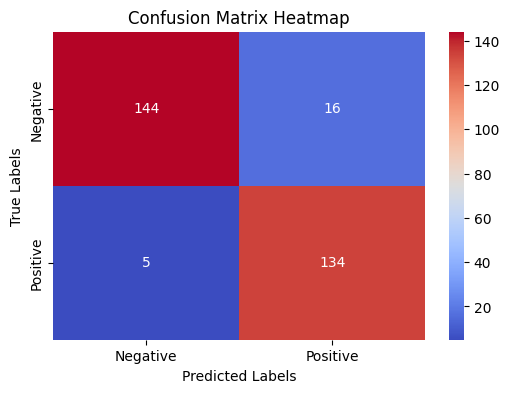

In [83]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung Confusion Matrix dan Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)  # Hasil Confusion Matrix
class_report = classification_report(y_test, y_pred)  # Hasil Classification Report

# Menampilkan hasil evaluasi dalam bentuk teks
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Menghitung Error Rate
TN, FP, FN, TP = conf_matrix.ravel()  # Mendapatkan nilai True Negative, False Positive, dll.
error_rate = (FP + FN) / (TN + FP + FN + TP)  # Perhitungan error rate
print(f"\nError Rate: {error_rate:.2f}")

# Visualisasi Heatmap untuk Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix Heatmap")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()